In [1]:
import pandas as pd
import numpy as np
import sklearn

from gensim.models import KeyedVectors

from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
sklearn.__version__

'0.24.2'

In [3]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def silhouette_analysis(X: np.array, min_clusters:int,max_clusters:int):
    for n_clusters in range(min_clusters, max_clusters):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

In [4]:
with open('./suggestions.txt', 'r', encoding='utf-8') as f:
    suggestions = [term[:-1] for term in f.readlines()]

In [5]:
glove_model = KeyedVectors.load_word2vec_format("./glove.6B.100d.w2vformat.txt6",binary=False)

In [6]:
suggestions = [term for term in suggestions if term in glove_model.index_to_key]
suggestion_terms_vectors = [glove_model.get_vector(term) for term in suggestions]

In [7]:
len(suggestions)

15363

For n_clusters = 2 The average silhouette_score is : 0.11893778
For n_clusters = 3 The average silhouette_score is : 0.05628097
For n_clusters = 4 The average silhouette_score is : 0.051710583
For n_clusters = 5 The average silhouette_score is : 0.041309863
For n_clusters = 6 The average silhouette_score is : 0.031709023
For n_clusters = 7 The average silhouette_score is : 0.027239116
For n_clusters = 8 The average silhouette_score is : 0.017826578
For n_clusters = 9 The average silhouette_score is : 0.014847157
For n_clusters = 10 The average silhouette_score is : 0.017286558
For n_clusters = 11 The average silhouette_score is : -0.008804454
For n_clusters = 12 The average silhouette_score is : -0.008808838
For n_clusters = 13 The average silhouette_score is : -0.009456923
For n_clusters = 14 The average silhouette_score is : -0.0075531616
For n_clusters = 15 The average silhouette_score is : -0.010308227
For n_clusters = 16 The average silhouette_score is : -0.0102413315
For n_cluste

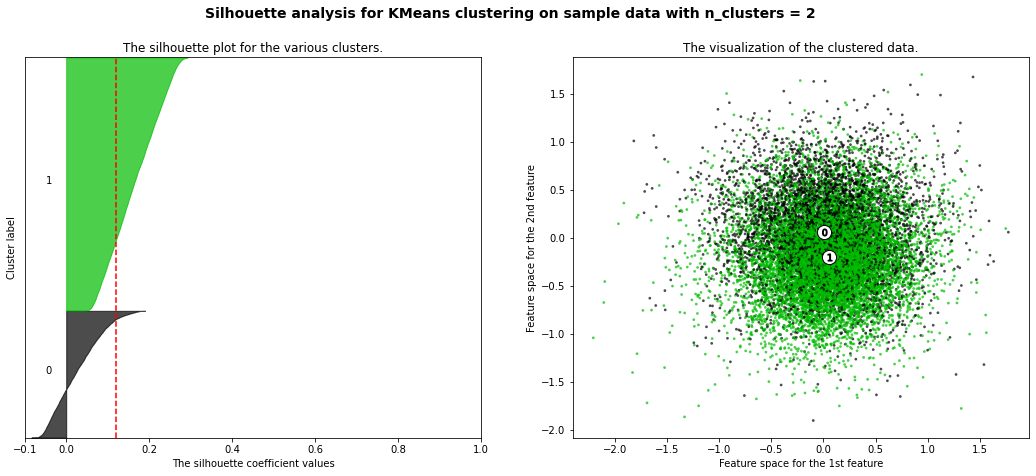

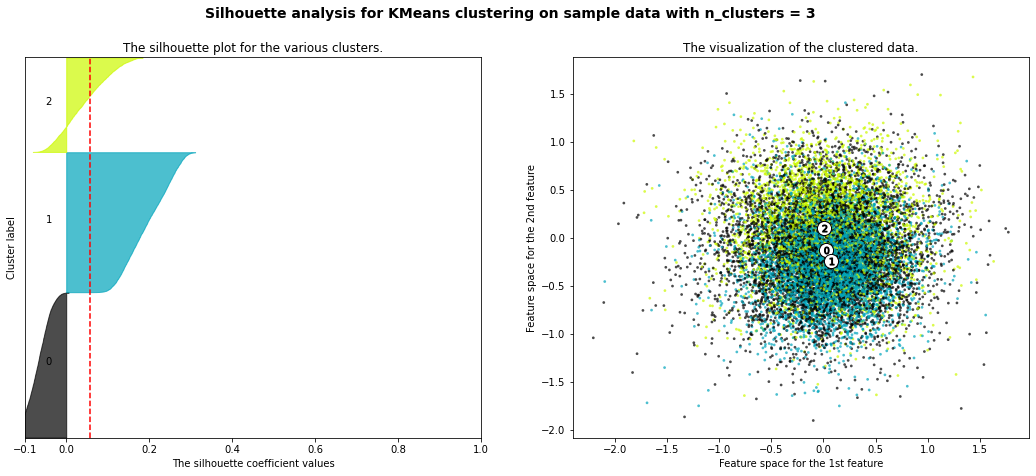

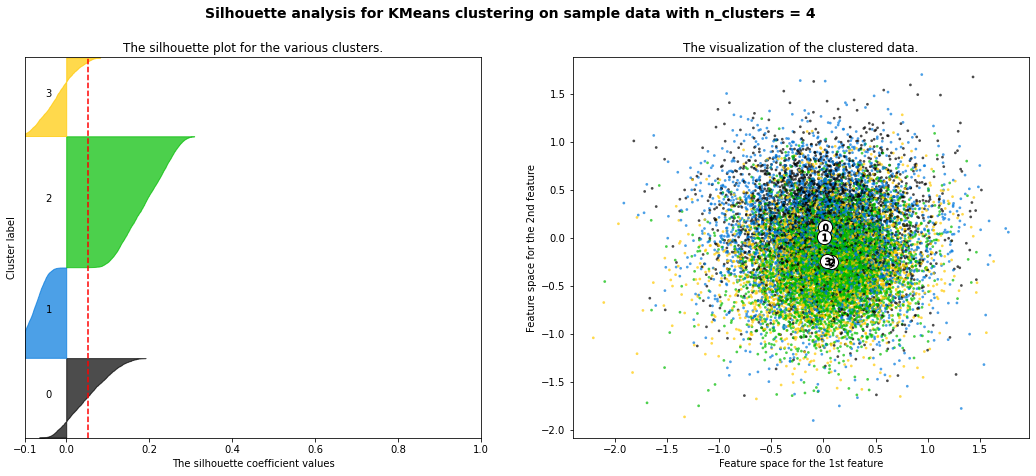

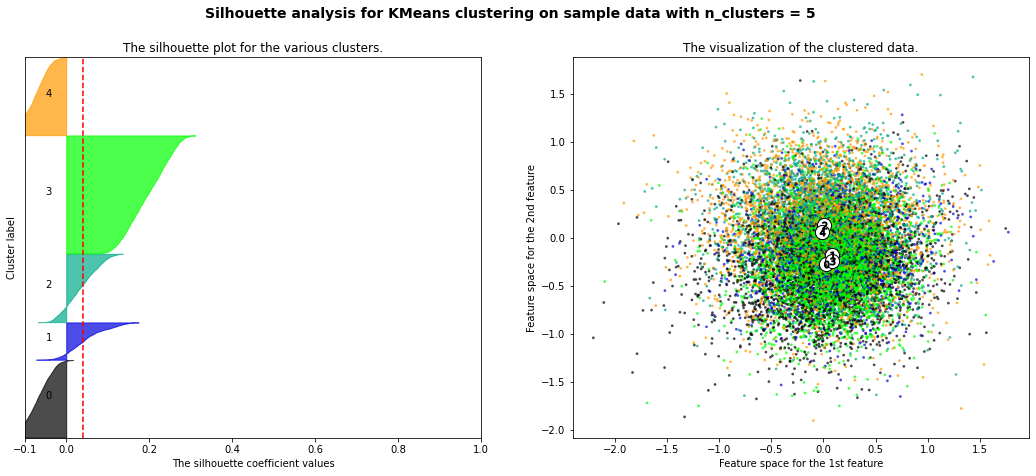

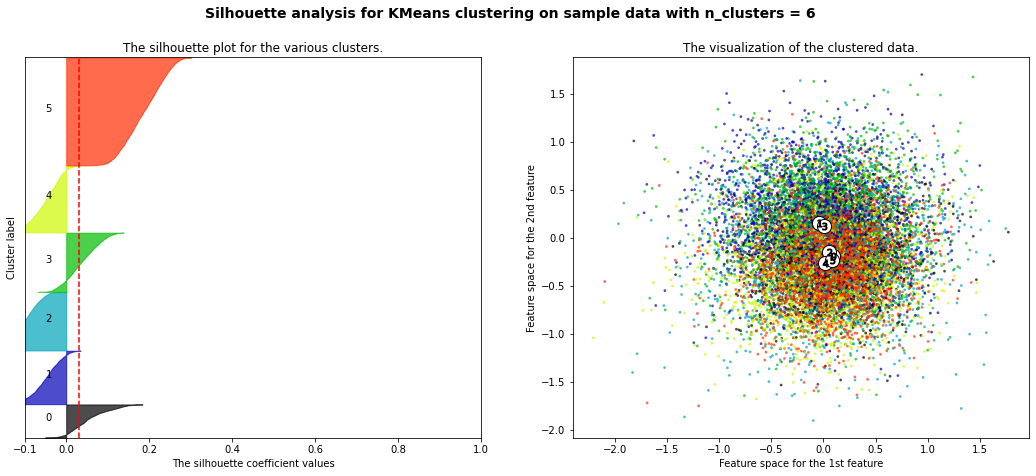

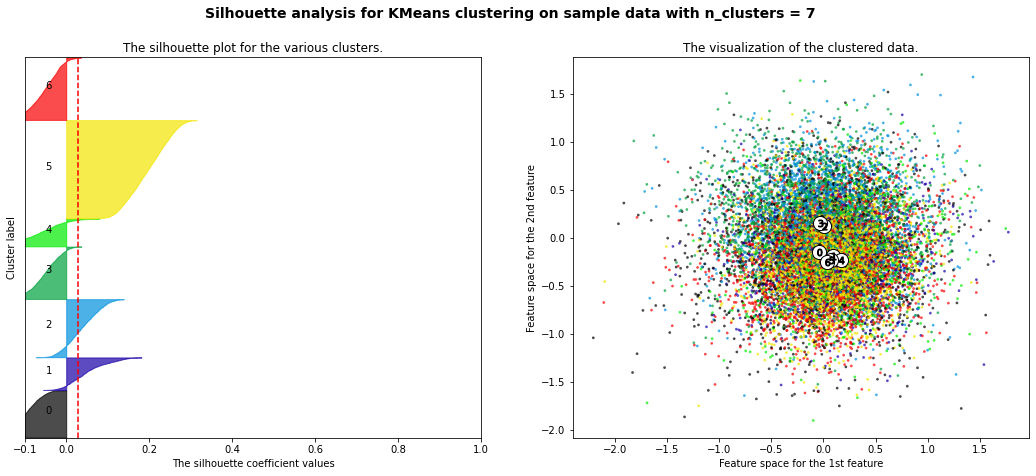

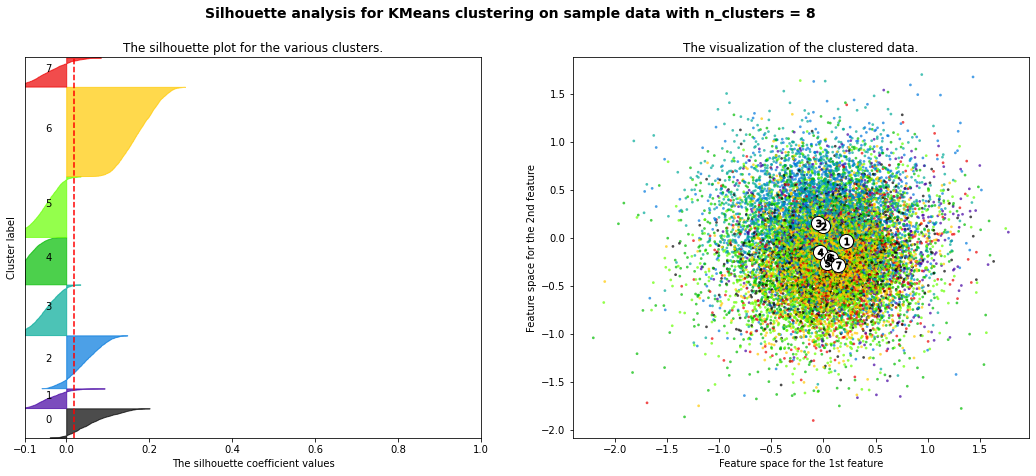

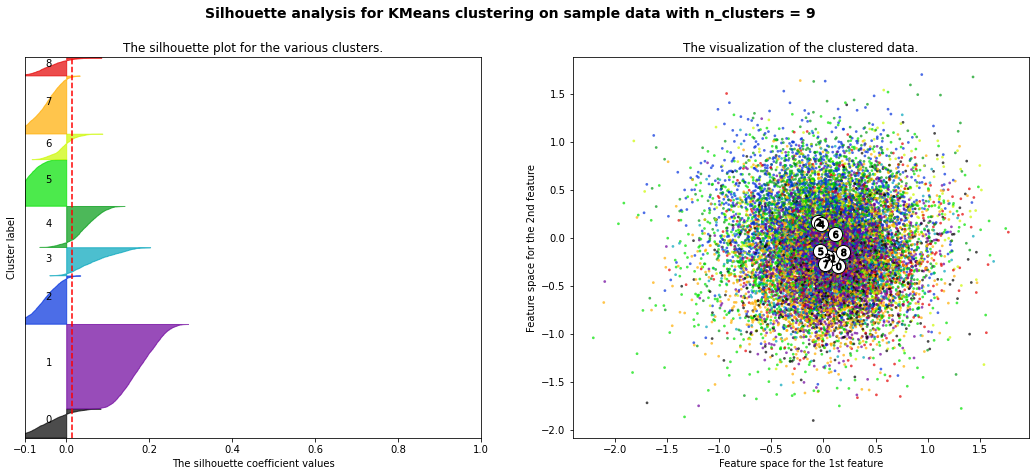

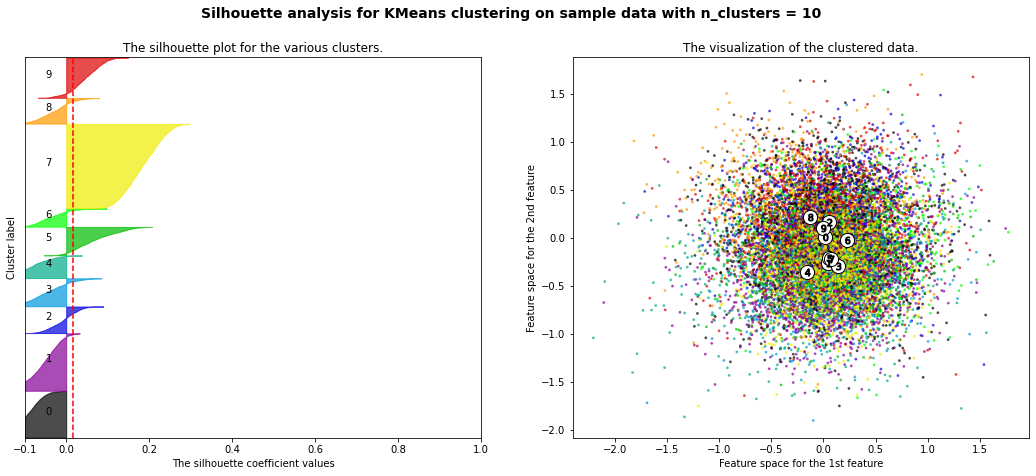

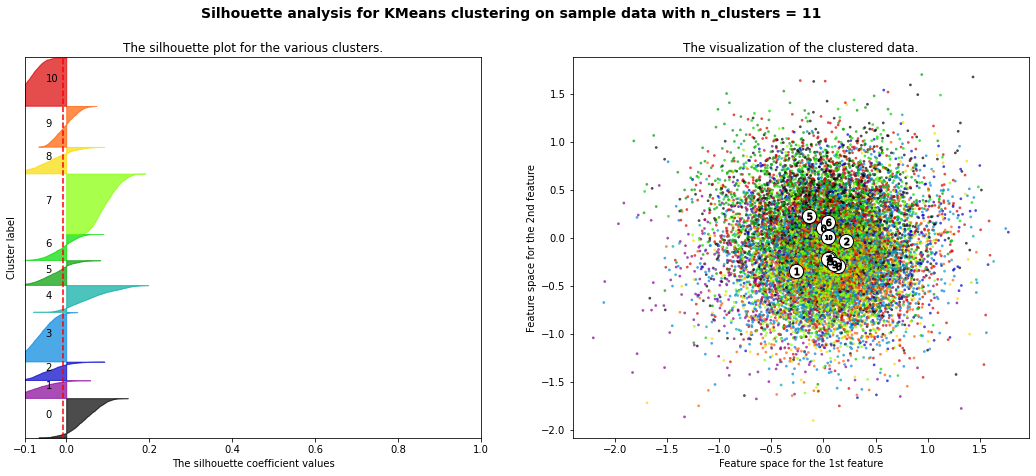

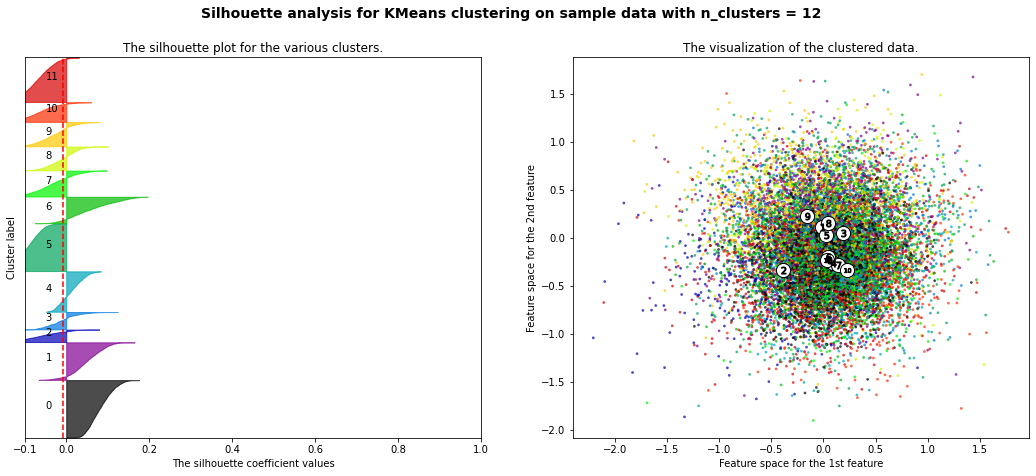

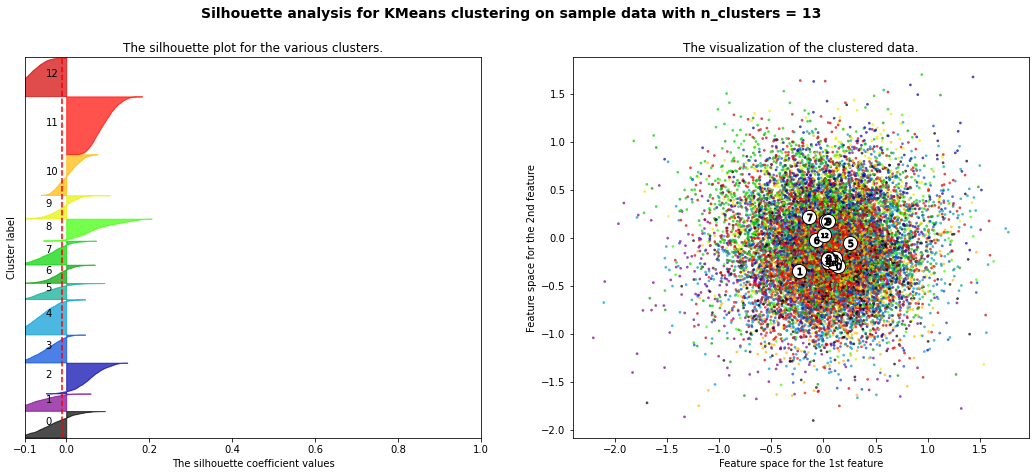

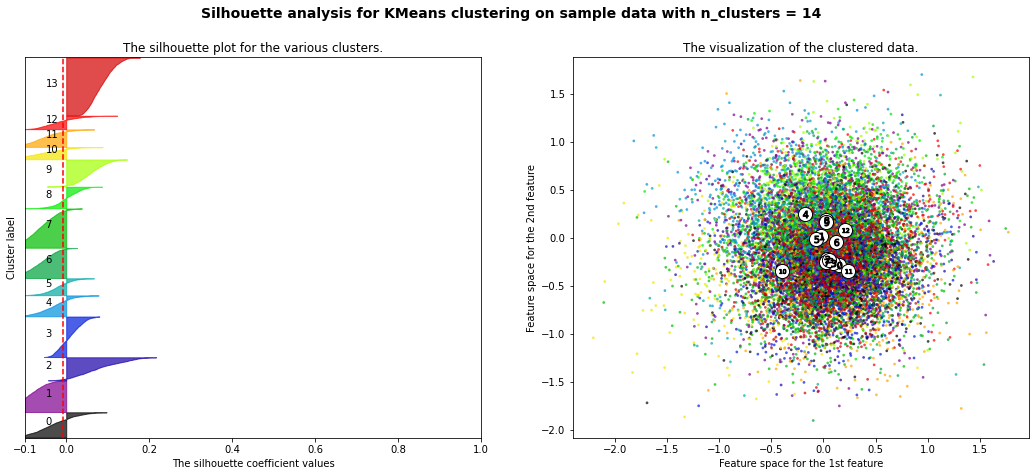

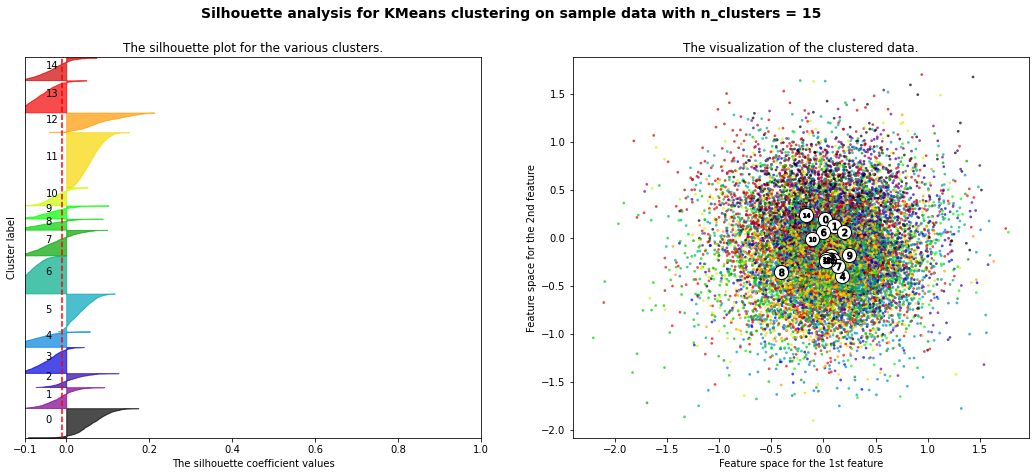

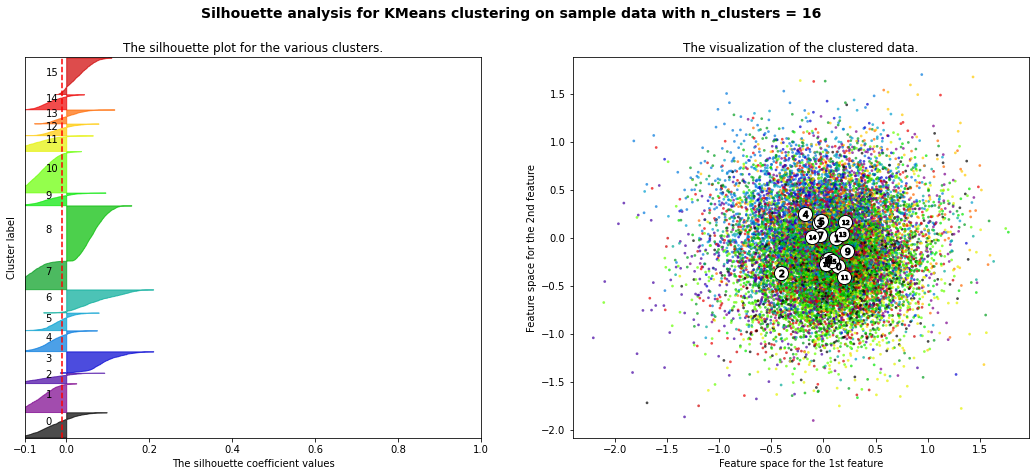

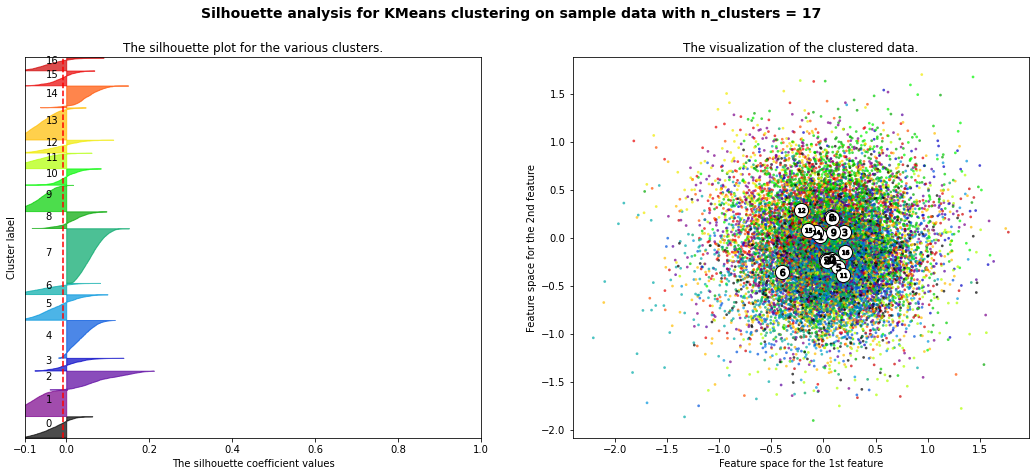

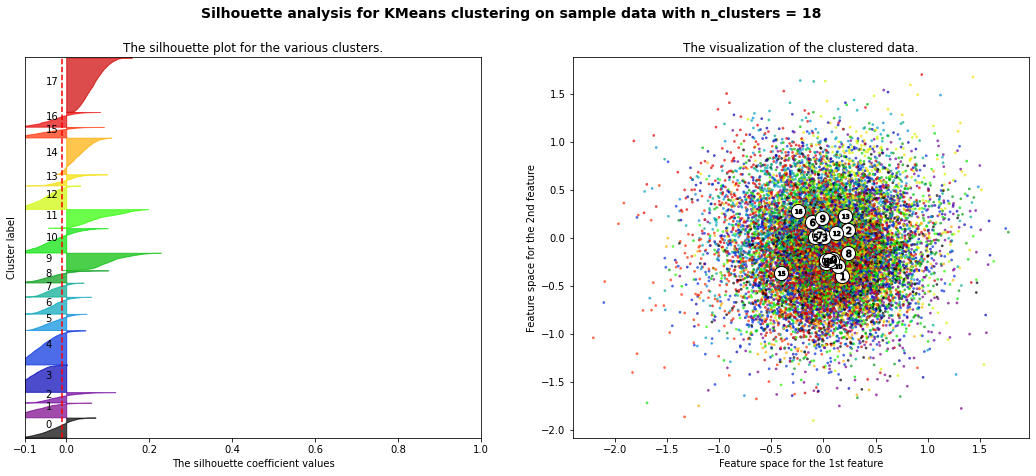

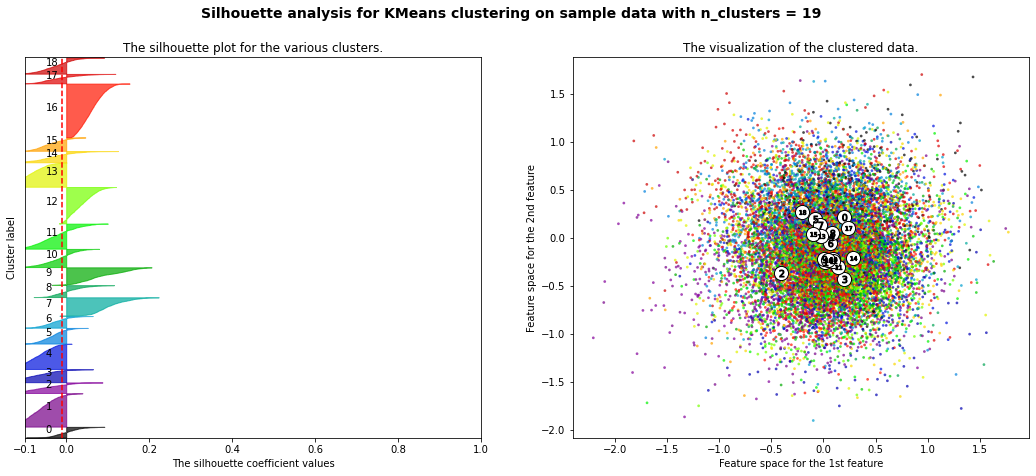

In [8]:
silhouette_analysis(np.array(suggestion_terms_vectors),2,20)

In [9]:
# https://github.com/duhaime/cluster-semantic-vectors/blob/master/cluster_vectors.py
class autovivify_list(dict):
  '''A pickleable version of collections.defaultdict'''
  def __missing__(self, key):
    '''Given a missing key, set initial value to an empty list'''
    value = self[key] = []
    return value

  def __add__(self, x):
    '''Override addition for numeric types when self is empty'''
    if not self and isinstance(x, Number):
      return x
    raise ValueError

  def __sub__(self, x):
    '''Also provide subtraction method'''
    if not self and isinstance(x, Number):
      return -1 * x
    raise ValueError

def build_word_vector_matrix(vector_file, label_file, n_words):
    '''Return the vectors and labels for the first n_words in vector file'''
    numpy_arrays = []
    labels_array = []
    for c, v in enumerate(label_file):
        labels_array.append(v)
        numpy_arrays.append(vector_file[c])

        if c == n_words:
            return np.array( numpy_arrays ), labels_array

    return np.array( numpy_arrays ), labels_array


def find_word_clusters(labels_array, cluster_labels):
  '''Return the set of words in each cluster'''
  cluster_to_words = autovivify_list()
  for c, i in enumerate(cluster_labels):
    cluster_to_words[ i ].append(labels_array[c] )
  return cluster_to_words

In [10]:
input_vector = np.array(suggestion_terms_vectors)
input_label = suggestions
df, labels_array = build_word_vector_matrix(input_vector, input_label, len(input_label))

# Baseline KMeans

In [13]:
kmeans_model = KMeans(init='k-means++', n_clusters=3, n_init=1,max_iter=200)
kmeans_model.fit(df)
labels = kmeans_model.labels_
suggestion_clusters_df=pd.DataFrame(list(zip(suggestions,suggestion_terms_vectors, labels)),columns=['title', 'vector', 'cluster'])

In [14]:
for i in sorted(suggestion_clusters_df.cluster.unique()):
    print('Cluster ',i,': ',suggestion_clusters_df[suggestion_clusters_df.cluster == i].title.to_list())

Cluster  0 :  ['erster', 'familie', 'instagram', 'ivanovna', 'kontakt', 'luiza', 'partei', 'auf', 'sprachen', 'köln', 'zurück', 'putina', 'putins', 'aktuell', 'buch', 'hochzeit', 'nachrichten', 'privat', 'russland', 'cz', 'caso', 'dragovic', 'elts', 'ey', 'iz', 'izaguirre', 'lukac', 'nrw', 'od', 'pahor', 'quelle', 'rog', 'staats', 'schon', 'tren', 'uz', 'ug', 'vian', 'weg', 'xls', 'alexanderplatz', 'stadt', 'flughafen', 'finanz', 'fotos', 'heute', 'haus', 'immobilien', 'kriti', 'kreuzberg', 'licht', 'mitte', 'nota', 'notar', 'olympias', 'quarta', 'reisen', 'rechts', 'schule', 'stadtteil', 'vor', 'zeit', 'biberach', 'polizei', 'kamp', 'wok', 'zoll', 'zug', 'europass', 'englisch', 'firma', 'quora', 'wert', 'chessbase', 'fre', 'bedeutung', 'duden', 'für', 'haar', 'juni', 'kurz', 'münchen', 'nicht', 'ohne', 'rech', 'reden', 'urlaub', 'warum', 'foto', 'kita', 'liste', 'leben', 'schweiz', 'vers', 'zum', 'xenia', 'bilder', 'grün', 'geld', 'italien', 'noch', 'zit', 'damen', 'einer', 'fußball',

In [33]:
suggestion_clusters_df.to_csv('./kmeans_clustering.csv')

# Affinity Propagation

In [13]:
'''AffinityPropagation creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given.'''

'AffinityPropagation creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given.'

In [15]:
AP = AffinityPropagation(random_state=5).fit(df)
labels = AP.labels_
AP_suggestion_clusters_df=pd.DataFrame(list(zip(suggestions,suggestion_terms_vectors, labels)),columns=['title', 'vector', 'cluster'])

In [16]:
for i in sorted(AP_suggestion_clusters_df.cluster.unique()):
    print('Cluster ',i,': ',AP_suggestion_clusters_df[AP_suggestion_clusters_df.cluster == i].title.to_list())

Cluster  0 :  ['becker', 'andre', 'hoch', 'muster', 'roland', 'ivo', 'johansson', 'dominik', 'haas', 'rubin', 'stefan', 'huber', 'jonas', 'stich', 'novak', 'lukas', 'clay', 'roger', 'goran', 'courier', 'rainer', 'tommy', 'kiefer', 'lindsay', 'clement', 'blake', 'jurgen', 'pierce', 'mcenroe', 'edberg', 'korda', 'dent', 'navratilova']
Cluster  1 :  ['chess', 'fide', 'grandmaster', 'darts', 'snooker', 'olympiad']
Cluster  2 :  ['interview', 'news', 'comments', 'statement', 'brief', 'press', 'briefing', 'speaking', 'interviews', 'comment', 'reporters', 'transcript']
Cluster  3 :  ['queen', 'elizabeth', 'alexandra', 'diana', 'royal', 'anne', 'lady', 'victoria', 'mary', 'margaret', 'jane', 'catherine', 'princess', 'duchess']
Cluster  4 :  ['yuri', 'gagarin', 'oleg', 'reza', 'nikolai', 'igor']
Cluster  5 :  ['gif', 'jpg', 'jpeg']
Cluster  6 :  ['garden', 'park', 'gardens', 'outdoor', 'parks', 'flower']
Cluster  7 :  ['conference', 'meeting', 'summit', 'leaders', 'meet', 'session', 'talks', 'd

In [17]:
AP_suggestion_clusters_df.to_csv('./AP_clustering.csv')

# Mean Shift

In [17]:
'''MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids. The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

The algorithm is not highly scalable, as it requires multiple nearest neighbor searches during the execution of the algorithm. The algorithm is guaranteed to converge, however the algorithm will stop iterating when the change in centroids is small.

Labelling a new sample is performed by finding the nearest centroid for a given sample.'''

'MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids. The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.\n\nThe algorithm is not highly scalable, as it requires multiple nearest neighbor searches during the execution of the algorithm. The algorithm is guaranteed to converge, however the algorithm will stop iterating when the change in centroids is small.\n\nLabelling a new sample is performed by finding the nearest centroid for a given sample.'

In [18]:
bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df)
labels = ms.labels_
ms_cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
ms_n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % ms_n_clusters_)

number of estimated clusters : 1


In [58]:
MS_suggestion_clusters_df=pd.DataFrame(list(zip(suggestions,suggestion_terms_vectors, labels)),columns=['title', 'vector', 'cluster'])

In [39]:
for i in sorted(MS_suggestion_clusters_df.cluster.unique()):
    print('Cluster ',i,': ',MS_suggestion_clusters_df[MS_suggestion_clusters_df.cluster == i].title.to_list())

Cluster  0 :  ['albert', 'boris', 'berlin', 'china', 'chess', 'deutsch', 'familie', 'instagram', 'jung', 'kinder', 'kontakt', 'mutter', 'news', 'nato', 'partei', 'quotes', 'queen', 'sprachen', 'ukraine', 'uni', 'viktor', 'wikipedia', 'xing', 'xii', 'xi', 'youtube', 'young', 'yu', 'yuri', 'yuki', 'zurück', 'putina', 'orf', 'putins', 'hand', 'intelligence', 'munich', 'aktuell', 'anno', 'award', 'article', 'bbc', 'bild', 'buch', 'biography', 'baby', 'comments', 'conference', 'college', 'email', 'education', 'express', 'english', 'germany', 'gif', 'girlfriend', 'gmbh', 'garden', 'hochzeit', 'hair', 'head', 'interview', 'job', 'jr', 'live', 'linkedin', 'london', 'latest', 'love', 'meeting', 'mail', 'married', 'nachrichten', 'office', 'out', 'oxford', 'photos', 'photo', 'pictures', 'parents', 'party', 'privat', 'quote', 'resign', 'relationship', 'russland', 'succeed', 'twitter', 'tv', 'times', 'text', 'uk', 'university', 'video', 'videos', 'voice', 'wiki', 'wife', 'wedding', 'yesterday', 'ak

In [40]:
MS_suggestion_clusters_df.to_csv('./MS_clustering.csv')

# Minibatch KMeans

In [23]:
'''The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

The algorithm iterates between two major steps, similar to vanilla k-means. In the first step,  samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all previous samples assigned to that centroid. This has the effect of decreasing the rate of change for a centroid over time. These steps are performed until convergence or a predetermined number of iterations is reached.

MiniBatchKMeans converges faster than KMeans, but the quality of the results is reduced. In practice this difference in quality can be quite small, as shown in the example and cited reference.'''

'The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.\n\nThe algorithm iterates between two major steps, similar to vanilla k-means. In the first step,  samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all pr

In [21]:
MB_kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=4096, max_iter=10).fit(df)
labels = MB_kmeans.labels_
MB_suggestion_clusters_df=pd.DataFrame(list(zip(suggestions,suggestion_terms_vectors, labels)),columns=['title', 'vector', 'cluster'])


In [22]:
for i in sorted(MB_suggestion_clusters_df.cluster.unique()):
    print('Cluster ',i,': ',MB_suggestion_clusters_df[MB_suggestion_clusters_df.cluster == i].title.to_list())

Cluster  0 :  ['aus', 'erster', 'deutsch', 'familie', 'instagram', 'ivanovna', 'mit', 'wie', 'alt', 'ist', 'kinder', 'kontakt', 'luiza', 'mutter', 'partei', 'auf', 'sprachen', 'uni', 'köln', 'bonn', 'wikipedia', 'xing', 'yuki', 'zurück', 'putina', 'orf', 'putins', '281', 'aktuell', 'anno', 'bild', 'buch', 'gif', 'gmbh', 'hochzeit', 'linkedin', 'nachrichten', 'privat', 'russland', 'wiki', 'ak', 'cz', 'caso', 'dat', 'dragovic', 'elts', 'ey', 'fink', 'herrmann', 'hag', 'hein', 'iz', 'izaguirre', 'kr', 'karloff', 'lukac', 'lilian', 'mai', 'müller', 'nrw', 'nikola', 'nowak', 'op', 'ode', 'od', 'pap', 'pahor', 'quad', 'quin', 'quelle', 'qui', 'ro', 'rog', 'ros', 'rut', 'schmid', 'sig', 'staats', 'schon', 'tren', 'und', 'uz', 'ug', 'vian', 'vogel', 'weg', 'xl', 'xls', 'zen', 'zar', 'alexanderplatz', 'brandenburg', 'stadt', 'deutschland', 'das', 'dresden', 'dfb', 'energie', 'flughafen', 'finanz', 'fotos', 'heute', 'hoch', 'haus', 'immobilien', 'kriti', 'kreuzberg', 'licht', 'mitte', 'nota', 'n

In [23]:
MB_suggestion_clusters_df.to_csv('./MBkmeans_clustering.csv')